<a href="https://colab.research.google.com/github/jems2019/CMPE-297-98-Project/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from time import time
import os


from sklearn.model_selection import train_test_split


# import keras
# import keras.layers as layers
# from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, BatchNormalization, Activation
# from keras.models import Sequential
# from keras.preprocessing.image import ImageDataGenerator
# from keras.utils.np_utils import to_categorical
# from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
# from keras.optimizers import Adam, SGD


import tensorflow as tf
from tensorflow import keras
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import LearningRateScheduler


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH = 32
imagegen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=.1,
    width_shift_range=.1,
    height_shift_range=.1,
    rotation_range=30,
    horizontal_flip=True,
    validation_split=.2
    )
train_generator = imagegen.flow_from_directory(
    directory='/content/drive/My Drive/Emerging Technologies Project - AI based trading platform/split_date_images',
    class_mode='categorical',
    target_size=(224,224),
    subset='training',
    batch_size=BATCH)
val_generator = imagegen.flow_from_directory(
    directory='/content/drive/My Drive/Emerging Technologies Project - AI based trading platform/split_date_images',
    class_mode='categorical',
    target_size=(224,224),
    subset='validation',
    batch_size=BATCH)

Found 1876 images belonging to 3 classes.
Found 468 images belonging to 3 classes.


In [0]:
# Getting the class indices from the data
print(train_generator.class_indices)
class_dictionary = train_generator.class_indices
class_dictionary = list(class_dictionary.keys())

{'buy': 0, 'hold': 1, 'sell': 2}


In [0]:
# use the functional api

tf.keras.backend.clear_session()
resnet = keras.applications.ResNet50V2(include_top=False, weights='imagenet', input_shape=(224,224,3))
# resnet = keras.applications.VGG16(include_top=False, input_shape=(224,224,3))

resnet.trainable=False
NUM_CLASSES = 3
model = keras.Sequential([
    resnet, 
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(rate=0.25),
    # keras.layers.Flatten(),
    keras.layers.Dense(units=20, activation='relu'),
    keras.layers.Dropout(rate=0.50),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')])

opt = Adam(lr=0.001)
model.compile(
    optimizer=opt, 
    loss=keras.losses.categorical_crossentropy, 
    metrics=['accuracy'])


In [0]:
# steps per epoch = length of training data

checkpoint = ModelCheckpoint("resnet.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

hist = model.fit_generator(steps_per_epoch=len(train_generator),
                           generator=train_generator, validation_data= val_generator, 
                           validation_steps=len(val_generator),epochs=100, shuffle=True, callbacks=[checkpoint,early])

Epoch 1/100
15/59 [======>.......................] - ETA: 1:09 - loss: 0.9997 - acc: 0.4573
Epoch 00001: val_acc improved from -inf to 0.45726, saving model to resnet.h5
59/59 [==============================] - 89s 2s/step - loss: 1.0399 - acc: 0.4398 - val_loss: 0.9997 - val_acc: 0.4573
Epoch 2/100
15/59 [======>.......................] - ETA: 1:06 - loss: 0.9848 - acc: 0.4679
Epoch 00002: val_acc improved from 0.45726 to 0.46795, saving model to resnet.h5
59/59 [==============================] - 73s 1s/step - loss: 1.0156 - acc: 0.4520 - val_loss: 0.9848 - val_acc: 0.4679
Epoch 3/100
15/59 [======>.......................] - ETA: 1:07 - loss: 0.9875 - acc: 0.4615
Epoch 00003: val_acc did not improve from 0.46795
59/59 [==============================] - 74s 1s/step - loss: 1.0111 - acc: 0.4686 - val_loss: 0.9875 - val_acc: 0.4615
Epoch 4/100
15/59 [======>.......................] - ETA: 1:06 - loss: 0.9779 - acc: 0.4615
Epoch 00004: val_acc did not improve from 0.46795
59/59 [=========

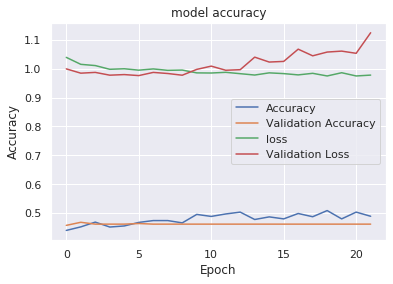

In [0]:
import matplotlib.pyplot as plt
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()


[[2.3685482e-24 1.0000000e+00 0.0000000e+00]]


'hold'

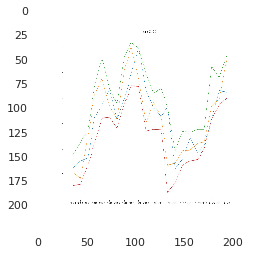

In [0]:
from keras.models import load_model
# saved_model = load_model("/content/resnet.h5")
# output = saved_model.predict(img)

from keras.preprocessing import image
img = image.load_img("/content/drive/My Drive/Emerging Technologies Project - AI based trading platform/split_date_images_test/sell/sell_FB_2013-04-01.jpeg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

output = model.predict(img)
print(output)
class_dictionary[np.argmax(output)]



---



In [0]:
import keras
import keras.layers as layers
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, BatchNormalization, Activation
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam, SGD


In [0]:
def build_model():
  model = Sequential()
  model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  # model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  # model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  # model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  # model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  # model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Flatten())
  model.add(BatchNormalization())
  model.add(Dense(units=128))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Dense(units=64))
  model.add(Activation("relu"))

  model.add(Dense(units=3, activation="softmax"))

  return model

In [0]:
tf.keras.backend.clear_session()

# opt = SGD(lr = 0.0005)
opt = Adam(lr=0.001)

model = build_model()
model.summary()

model.compile(optimizer=opt, loss=keras.losses.binary_crossentropy, metrics=['accuracy'])






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       590080    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 256) 

In [0]:
# steps per epoch = length of training data

checkpoint = ModelCheckpoint("test.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

hist = model.fit_generator(steps_per_epoch=len(train_generator),
                           generator=train_generator, validation_data= val_generator, 
                           validation_steps=len(val_generator),epochs=100, shuffle=True, callbacks=[checkpoint,early])




Epoch 1/100





59/59 [==============================] - 741s 13s/step - loss: 0.6643 - acc: 0.6474 - val_loss: 9.2482 - val_acc: 0.4231

Epoch 00001: val_acc improved from -inf to 0.42308, saving model to test.h5
Epoch 2/100
59/59 [==============================] - 68s 1s/step - loss: 0.6126 - acc: 0.6584 - val_loss: 9.2482 - val_acc: 0.4231

Epoch 00002: val_acc did not improve from 0.42308
Epoch 3/100
59/59 [==============================] - 76s 1s/step - loss: 0.5971 - acc: 0.6673 - val_loss: 5.9175 - val_acc: 0.6026

Epoch 00003: val_acc improved from 0.42308 to 0.60256, saving model to test.h5
Epoch 4/100
59/59 [==============================] - 76s 1s/step - loss: 0.5927 - acc: 0.6744 - val_loss: 2.4167 - val_acc: 0.4729

Epoch 00004: val_acc did not improve from 0.60256
Epoch 5/100
59/59 [==============================] - 76s 1s/step - loss: 0.5876 - acc: 0.6817 - val_loss: 9.2482 - val_acc: 0.4231

Epoch 00005: val_acc did not improve from 0.60256
Epoch 6/100
59/59 [======

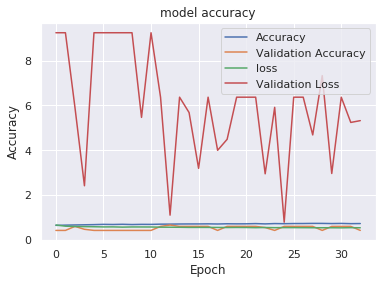

In [0]:
import matplotlib.pyplot as plt
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [0]:
test_generator = imagegen.flow_from_directory(
    directory='/content/drive/My Drive/Emerging Technologies Project - AI based trading platform/split_date_images',
    class_mode='categorical',
    target_size=(224,224),
    subset='validation',
    batch_size=BATCH)

Found 468 images belonging to 3 classes.


[[0. 1. 0.]]


'hold'

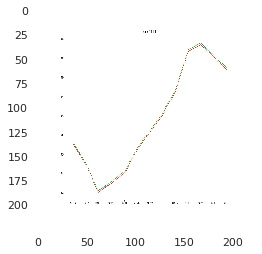

In [0]:
from keras.models import load_model
saved_model = load_model("test.h5")
output = saved_model.predict(img)

from keras.preprocessing import image
img = image.load_img("/content/drive/My Drive/Emerging Technologies Project - AI based trading platform/split_date_images/hold/hold_AAPL_1980-12-12.jpeg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

output = saved_model.predict(img)
print(output)
class_dictionary[np.argmax(output)]

[[0. 1. 0.]]


'hold'

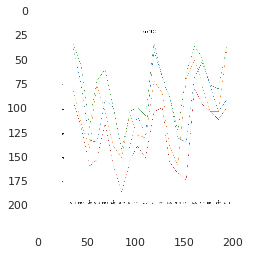

In [0]:
from keras.preprocessing import image
img = image.load_img("/content/drive/My Drive/Emerging Technologies Project - AI based trading platform/test_stock.jpeg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

output = model.predict(img)
print(output)
class_dictionary[np.argmax(output)]



---

